# Data preparation - Energy System Modelling

<h3>1. Demand forecast data and Capacity factor data

In [2]:
import pandas as pd

This function returns a dataframe with forecasted demand data (2030 or 2040) from entsoe for a given weather year. The initial dataset contains forecasts for a range of different weather years. The function takes one year as input, as well as the sheet name, representing either DK1 or DK2 (The excel file contains one sheet for these areas for both 2030 and 2040). Link to data: https://2024.entsos-tyndp-scenarios.eu/download/#:~:text=The%20data%20published%20on%20this,and%20saved%20free%20of%20charge 

In [3]:
def get_demand_year(sheet_name, wetheryear, path = "demand_forecast_2030-2040.xlsx"):
    
    sheet_names=["DKW1-2030", "DKE1-2030", "DKW1-2040", "DKE1-2040"]
    if sheet_name in sheet_names:
        df =  pd.read_excel(path,skiprows=7, sheet_name=sheet_name)
        valid_years = df.columns[3:]
        if wetheryear not in valid_years:
            print("Not a valid year")
            return
        sub = df[["Date", "Month", "Day", "Hour", wetheryear]]
        years = [2030, 2040]
        
        for y in years:
            if str(y)in sheet_name:
                sub["Date"] = sub["Date"].apply(lambda row: row.replace(year=y))
                break
                
        return sub.rename(columns={wetheryear: f"{sheet_name[:3]}_{wetheryear}"})
        
    else:
        print("Sheet name doesnt exist")
        return
    

* Call to get 2030 DK1 forecast demand for weather year 2019:

In [4]:
demand1 = get_demand_year("DKW1-2030", 2019)
demand1.head()

C:\Users\mathi\AppData\Local\Temp\ipykernel_28920\2017346235.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub["Date"] = sub["Date"].apply(lambda row: row.replace(year=y))


,Date,Month,Day,Hour,DKW_2019
0,2030-01-01 00:00:00,0,1,0,3132.365992
1,2030-01-01 01:00:00,0,1,1,3067.894490
2,2030-01-01 02:00:00,0,1,2,3018.286447
3,2030-01-01 03:00:00,0,1,3,2991.287534
4,2030-01-01 04:00:00,0,1,4,2984.823863


* Call to get 2030 DK2 forecast demand for weather year 2019:

In [5]:
demand2 = get_demand_year("DKE1-2030", 2019)
demand2.head()

C:\Users\mathi\AppData\Local\Temp\ipykernel_28920\2017346235.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub["Date"] = sub["Date"].apply(lambda row: row.replace(year=y))


,Date,Month,Day,Hour,DKE_2019
0,2030-01-01 00:00:00,0,1,0,1701.742630
1,2030-01-01 01:00:00,0,1,1,1607.128149
2,2030-01-01 02:00:00,0,1,2,1564.311435
3,2030-01-01 03:00:00,0,1,3,1532.289999
4,2030-01-01 04:00:00,0,1,4,1511.201877


* Call to get 2040 DK1 forecast demand for weather year 2019:

In [6]:
demand3 = get_demand_year("DKW1-2040", 2019)
demand3.head()

C:\Users\mathi\AppData\Local\Temp\ipykernel_28920\2017346235.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub["Date"] = sub["Date"].apply(lambda row: row.replace(year=y))


,Date,Month,Day,Hour,DKW_2019
0,2040-01-01 00:00:00,0,1,0,4614.919144
1,2040-01-01 01:00:00,0,1,1,4441.428230
2,2040-01-01 02:00:00,0,1,2,4301.377112
3,2040-01-01 03:00:00,0,1,3,4209.184518
4,2040-01-01 04:00:00,0,1,4,4163.970178


* Call to get 2040 DK2 forecast demand for weather year 2019:

In [7]:
demand4 = get_demand_year("DKE1-2040", 2019)
demand4.head()

C:\Users\mathi\AppData\Local\Temp\ipykernel_28920\2017346235.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub["Date"] = sub["Date"].apply(lambda row: row.replace(year=y))


,Date,Month,Day,Hour,DKE_2019
0,2040-01-01 00:00:00,0,1,0,2405.515844
1,2040-01-01 01:00:00,0,1,1,2232.224740
2,2040-01-01 02:00:00,0,1,2,2129.377505
3,2040-01-01 03:00:00,0,1,3,2050.393263
4,2040-01-01 04:00:00,0,1,4,1995.655149


* Merge the data to two separate datasets; one for 2030 forecasts and one for 2040 forecasts:

In [8]:
demand_2030 = pd.merge(demand1, demand2, how="inner", on="Date")
demand_2030["aggregated_demand"] = demand_2030["DKW_2019"] + demand_2030["DKE_2019"] 
demand_2030 = demand_2030[["Date", "aggregated_demand"]]
demand_2030.head()

,Date,aggregated_demand
0,2030-01-01 00:00:00,4834.108622
1,2030-01-01 01:00:00,4675.022639
2,2030-01-01 02:00:00,4582.597881
3,2030-01-01 03:00:00,4523.577533
4,2030-01-01 04:00:00,4496.025740


In [9]:
demand_2040 = pd.merge(demand3, demand4, how="inner", on="Date")
demand_2040["aggregated_demand"] = demand_2040["DKW_2019"] + demand_2040["DKE_2019"] 
demand_2040 = demand_2040[["Date", "aggregated_demand"]]
demand_2040.head()

,Date,aggregated_demand
0,2040-01-01 00:00:00,7020.434988
1,2040-01-01 01:00:00,6673.652970
2,2040-01-01 02:00:00,6430.754617
3,2040-01-01 03:00:00,6259.577781
4,2040-01-01 04:00:00,6159.625326


This second function gets the historical capacity factors for solar pv, offshore wind or onshore wind in Denmark. The idea is that one historical weather year is representative for the future capacity factor. The data is obtained from renewables.ninja: https://www.renewables.ninja/ 

In [10]:
def get_capacity_factor(weatheryear, path):
    df = pd.read_csv(path, skiprows=3)
    df.time = pd.to_datetime(df.time)
    sources = ["pv", "offshore", "onshore"]
    name = None
    for s in sources:
        if s in path:
            name = s
            break
    if name == "pv":
        sub = df[df['time'].dt.year == weatheryear][["time", "NATIONAL"]]
        return sub.rename(columns = {"NATIONAL": f"{name}_aggregated_capacity_factor"})

        
   
    df[f"{name}_aggregated_capacity_factor"] = (df["DK01"] + df["DK02"] + df["DK03"] +df["DK04"] + df["DK05"])/5
    sub = df[df['time'].dt.year == weatheryear][["time", f"{name}_aggregated_capacity_factor"]]
    return sub
    
    

* Call the fuctnion to get solar pv capacity factor for the weather year 2019 (to match the demand weather year)

In [11]:
pv = get_capacity_factor(2019, "ninja-pv-country-DK-national-merra2.csv")
pv.head()

,time,pv_aggregated_capacity_factor
341880,2019-01-01 00:00:00+00:00,0.0
341881,2019-01-01 01:00:00+00:00,0.0
341882,2019-01-01 02:00:00+00:00,0.0
341883,2019-01-01 03:00:00+00:00,0.0
341884,2019-01-01 04:00:00+00:00,0.0


In [12]:
pv.pv_aggregated_capacity_factor.describe()

count    8760.000000
mean        0.113517
std         0.180528
min         0.000000
25%         0.000000
50%         0.000000
75%         0.171250
max         0.728000
Name: pv_aggregated_capacity_factor, dtype: float64

* Call the fuctnion to get offshore wind capacity factor for the weather year 2019:

In [13]:
offshore = get_capacity_factor(2019, "ninja-wind-country-DK-future_offshore-merra2.csv")
offshore.head()

,time,offshore_aggregated_capacity_factor
341880,2019-01-01 00:00:00+00:00,0.891849
341881,2019-01-01 01:00:00+00:00,0.913412
341882,2019-01-01 02:00:00+00:00,0.924670
341883,2019-01-01 03:00:00+00:00,0.937683
341884,2019-01-01 04:00:00+00:00,0.951262


In [14]:
offshore.offshore_aggregated_capacity_factor.describe()

count    8760.000000
mean        0.360492
std         0.206209
min         0.011630
25%         0.199645
50%         0.325512
75%         0.490228
max         0.971875
Name: offshore_aggregated_capacity_factor, dtype: float64

* Call the fuctnion to get onshore wind capacity factor for the weather year 2019

In [15]:
onshore = get_capacity_factor(2019, "ninja-wind-country-DK-future_onshore-merra2.csv")
onshore.head()

,time,onshore_aggregated_capacity_factor
341880,2019-01-01 00:00:00+00:00,0.779246
341881,2019-01-01 01:00:00+00:00,0.813199
341882,2019-01-01 02:00:00+00:00,0.838057
341883,2019-01-01 03:00:00+00:00,0.861093
341884,2019-01-01 04:00:00+00:00,0.884924


In [16]:
onshore.onshore_aggregated_capacity_factor.describe()

count    8760.000000
mean        0.268413
std         0.187133
min         0.004257
25%         0.130806
50%         0.220468
75%         0.367712
max         0.952528
Name: onshore_aggregated_capacity_factor, dtype: float64

* The three datasets contains the same number of rows, which makes it easy to do a inner join:

In [17]:
print(len(pv))
print(len(onshore))
print(len(offshore))

8760
8760
8760


* We merge these capacity factors with both the demand data for 2030 and 2040, assuming that the capacity factors will follow the same patterns in these coming years:

In [18]:
all_cap_factors = pd.merge(pd.merge(pv, onshore, how="inner", on="time"), offshore, how="inner", on="time")

data_2030 = pd.concat([all_cap_factors, demand_2030], axis=1).drop(columns=["time"])
data_2030

,pv_aggregated_capacity_factor,onshore_aggregated_capacity_factor,offshore_aggregated_capacity_factor,Date,aggregated_demand
0,0.0,0.779246,0.891849,2030-01-01 00:00:00,4834.108622
1,0.0,0.813199,0.913412,2030-01-01 01:00:00,4675.022639
2,0.0,0.838057,0.924670,2030-01-01 02:00:00,4582.597881
3,0.0,0.861093,0.937683,2030-01-01 03:00:00,4523.577533
4,0.0,0.884924,0.951262,2030-01-01 04:00:00,4496.025740
...,...,...,...,...,...
8755,0.0,0.267326,0.335437,2030-12-31 19:00:00,6643.609222
8756,0.0,0.246083,0.308239,2030-12-31 20:00:00,6304.742528
8757,0.0,0.247001,0.310474,2030-12-31 21:00:00,5861.057981
8758,0.0,0.267938,0.338124,2030-12-31 22:00:00,5517.699288


In [19]:
data_2040 = pd.concat([all_cap_factors, demand_2040], axis=1).drop(columns=["time"])
data_2040

,pv_aggregated_capacity_factor,onshore_aggregated_capacity_factor,offshore_aggregated_capacity_factor,Date,aggregated_demand
0,0.0,0.779246,0.891849,2040-01-01 00:00:00,7020.434988
1,0.0,0.813199,0.913412,2040-01-01 01:00:00,6673.652970
2,0.0,0.838057,0.924670,2040-01-01 02:00:00,6430.754617
3,0.0,0.861093,0.937683,2040-01-01 03:00:00,6259.577781
4,0.0,0.884924,0.951262,2040-01-01 04:00:00,6159.625326
...,...,...,...,...,...
8755,0.0,0.267326,0.335437,2040-12-31 19:00:00,9345.480462
8756,0.0,0.246083,0.308239,2040-12-31 20:00:00,8912.272915
8757,0.0,0.247001,0.310474,2040-12-31 21:00:00,8357.929392
8758,0.0,0.267938,0.338124,2040-12-31 22:00:00,7970.527323


* Some plots:

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

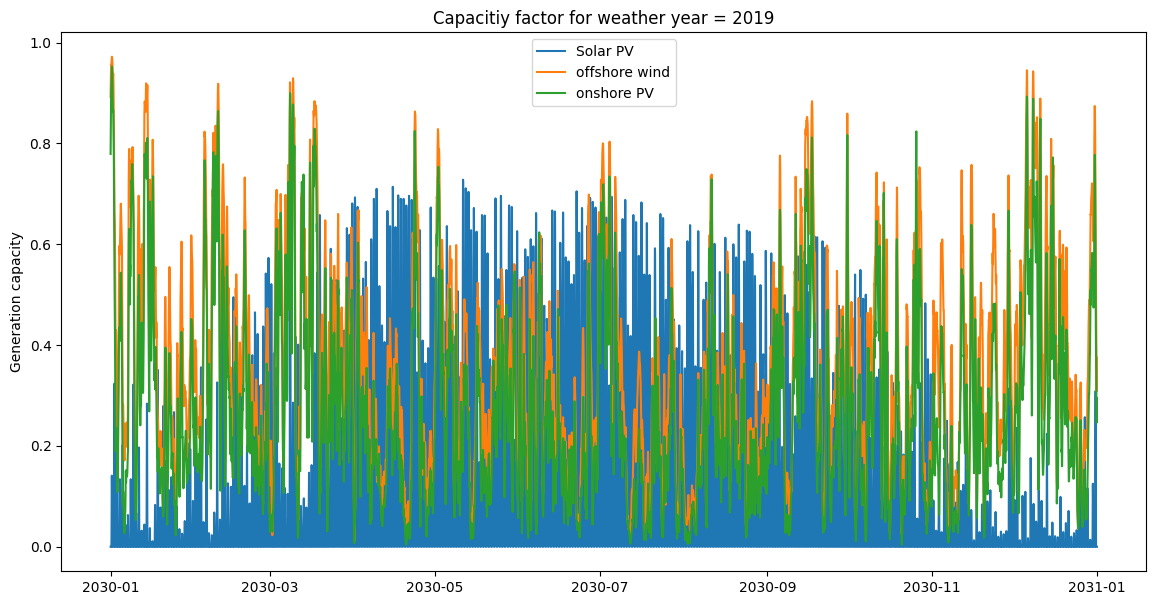

In [21]:
plt.figure(figsize=(14,7))
X = data_2030.Date
plt.plot(X, data_2030.pv_aggregated_capacity_factor, label="Solar PV")
plt.plot(X, data_2030.offshore_aggregated_capacity_factor, label="offshore wind")
plt.plot(X, data_2030.onshore_aggregated_capacity_factor, label="onshore PV")

plt.title("Capacitiy factor for weather year = 2019")
plt.ylabel("Generation capacity")
plt.legend()

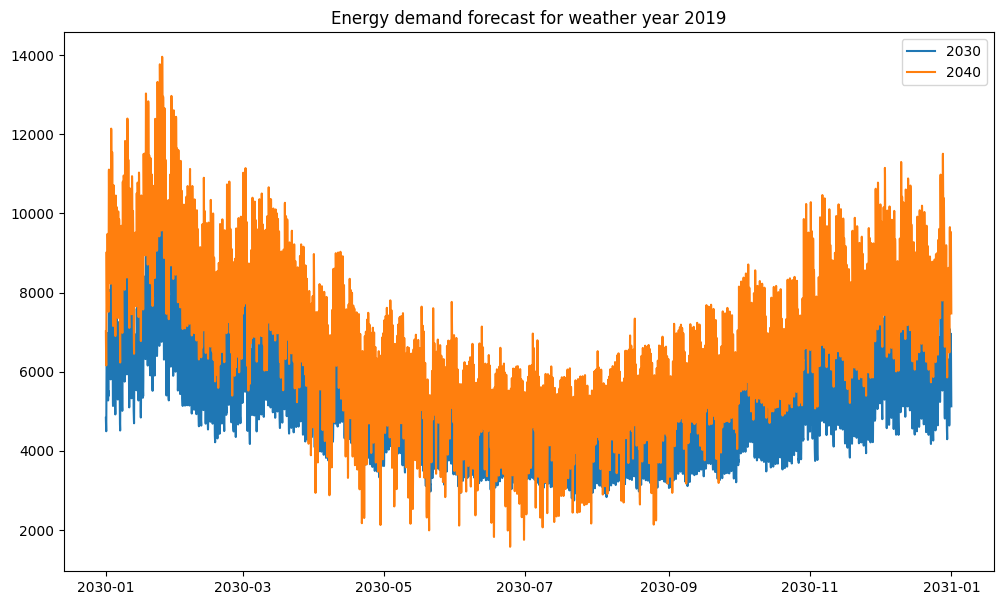

In [22]:
plt.figure(figsize=(12,7))
plt.plot(X, data_2030.aggregated_demand, label="2030")
plt.plot(X, data_2040.aggregated_demand, label="2040")
plt.title("Energy demand forecast for weather year 2019")
plt.legend()



* Run this to save the final datasets:

In [23]:
data_2030.to_csv("demand_and_cf_2030.csv")
data_2040.to_csv("demand_and_cf_2030.csv")